### 1. Loading libraries

In [10]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Imputers
from sklearn.impute import KNNImputer, SimpleImputer

# Standardization scalers
from sklearn.preprocessing import StandardScaler

# Splitting data
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
import random
random.seed(42)


#For clustering
# --- Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans

from scipy.stats import ttest_rel
from itertools import combinations
from statsmodels.stats.multitest import multipletests

### 2. Loading the data

In [11]:
# Path to the data files
data_path = '../data/HR_data.csv'

# Create a pandas dataframe and use the first row as the column names
data_pd = pd.read_csv(data_path)

#remove the first column and reorder so the non numeric columns are the first
data_pd = data_pd.iloc[:, 1:]

# renaming Frustrated to frustrated
data_pd = data_pd.rename(columns={
    "Frustrated": "frustrated"
})

#Moving identufyer columns up
id_columns = ['Round', 'Phase', 'Individual','Puzzler', 'Cohort']
numeric_columns = [col for col in data_pd.columns if col not in id_columns]
data_pd = data_pd[id_columns + numeric_columns]
# 
# Print the shape of the data in the pandas dataframe
print("The shape of the data")
print(data_pd.shape)

The shape of the data
(312, 67)


In [12]:
data_pd.columns

Index(['Round', 'Phase', 'Individual', 'Puzzler', 'Cohort', 'HR_TD_Mean',
       'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max', 'HR_TD_AUC',
       'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min', 'HR_TD_Slope_max',
       'HR_TD_Slope_mean', 'HR_TD_Slope', 'TEMP_TD_Mean', 'TEMP_TD_Median',
       'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max', 'TEMP_TD_AUC',
       'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min',
       'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope',
       'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min',
       'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew',
       'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean',
       'EDA_TD_P_Slope', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std',
       'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis',
       'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max',
       'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope', 'EDA_

In [13]:
column_list = data_pd.columns
count = 0
for column in column_list:
    if column.startswith("HR") or column.startswith("EDA") or column.startswith("TEMP"):
        count += 1
print(f"Number of TEMP, HR, EDA columns: {count}")

Number of TEMP, HR, EDA columns: 51


In [14]:
data_pd

,Round,Phase,Individual,Puzzler,Cohort,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,HR_TD_Slope_mean,HR_TD_Slope,TEMP_TD_Mean,TEMP_TD_Median,TEMP_TD_std,TEMP_TD_Min,TEMP_TD_Max,TEMP_TD_AUC,TEMP_TD_Kurtosis,TEMP_TD_Skew,TEMP_TD_Slope_min,TEMP_TD_Slope_max,TEMP_TD_Slope_mean,TEMP_TD_Slope,EDA_TD_P_Mean,EDA_TD_P_Median,EDA_TD_P_std,EDA_TD_P_Min,EDA_TD_P_Max,EDA_TD_P_AUC,EDA_TD_P_Kurtosis,EDA_TD_P_Skew,EDA_TD_P_Slope_min,EDA_TD_P_Slope_max,EDA_TD_P_Slope_mean,EDA_TD_P_Slope,EDA_TD_T_Mean,EDA_TD_T_Median,EDA_TD_T_std,EDA_TD_T_Min,EDA_TD_T_Max,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT,frustrated,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,round_3,phase3,1,1,D1_4,78.663878,76.700,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.730000,0.9775,0.044590,0.046701,31.090000,31.11,0.163895,30.59,31.31,36593.14,1.349570,-1.352915,-0.002286,0.000377,-0.000589,-0.000455,0.000172,0.000006,0.000927,-0.006185,0.007375,0.202712,28.467716,1.091696,-0.000200,0.000198,-0.000004,4.360220e-06,0.181286,0.182695,0.003744,0.169440,0.186816,213.374114,1.345997,-1.379434,-0.000144,0.000138,0.000010,1.036040e-05,11,2.522727,2.075000,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,round_3,phase2,1,1,D1_4,76.540732,76.610,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.360000,0.1900,-0.028095,-0.024148,30.937293,30.93,0.083766,30.81,31.17,38826.24,0.177872,0.898894,-0.001062,0.000714,0.000232,0.000241,0.000489,0.000035,0.001138,0.000000,0.008462,0.614382,18.455509,3.948751,-0.000273,0.000451,0.000001,-2.617585e-06,0.169909,0.169617,0.002976,0.164504,0.179273,213.235380,0.887010,0.854067,-0.000146,0.000165,0.000009,7.714503e-06,15,2.214286,2.192308,3.0,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,round_3,phase1,1,1,D1_4,78.173563,77.920,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.630000,0.3575,-0.024202,-0.026008,30.735341,30.75,0.078038,30.59,30.89,31964.72,-0.956503,-0.143041,-0.000962,0.000777,-0.000085,-0.000155,0.000155,0.000002,0.000444,0.000000,0.005550,0.161122,36.768442,5.151764,-0.000045,0.000054,-0.000001,-1.084815e-06,0.166798,0.166706,0.002266,0.162036,0.172624,173.465157,0.205817,0.480581,-0.000112,0.000132,0.000002,1.799914e-06,10,1.972222,2.111111,2.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,round_2,phase3,1,1,D1_4,83.073688,83.880,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.465000,0.6500,0.021375,0.021477,30.505025,30.29,0.366089,30.11,31.15,36758.35,-1.513910,0.503921,-0.000556,0.002963,0.000667,0.000704,0.000673,0.000018,0.001829,0.000000,0.012784,0.811271,19.045235,4.165664,-0.000271,0.000309,0.000002,-5.062888e-08,0.159292,0.158034,0.004789,0.148368,0.175496,191.943390,2.488339,1.246665,-0.000455,0.000481,-0.000001,-1.355151e-07,12,1.886364,1.805556,2.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,round_2,phase2,1,1,D1_4,72.281250,72.910,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.372500,0.3375,-0.013555,-0.012871,30.332578,30.35,0.110119,30.11,30.53,38795.38,-1.456255,-0.171929,-0.000962,0.000192,-0.000314,-0.000300,0.001164,0.000074,0.002936,-0.001992,0.022954,1.484085,20.998111,4.209074,-0.000646,0.000639,0.000005,1.344367e-05,0.150387,0.147895,0.006473,0.143003,0.168106,192.341180,1.196508,1.592099,-0.000420,0.000334,0.000014,1.267198e-05,20,1.812500,1.926471,2.0,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,round_4,phase2,26,1,D1_5,82.019065,78.830,8.794206,69.73,97.18,26244.705,-1.386324,0.251382,-0.517500,0.3525,-0.020180,-0.021384,31.475327,31.49,0.068601,31.33,31.59,40382.90,-0.798146,-0.475693,-0.000762,0.00

### 3. Data cleaning

In [15]:
# Shows count of NaNs per column
na_summary = data_pd.isna().sum()
# Display only columns with at least 1 NaN (optional)
na_summary = na_summary[na_summary > 0]
print("Columns with numbe rof missing values in them:\n")
print(na_summary)

Columns with numbe rof missing values in them:

EDA_TD_P_RT     1
EDA_TD_P_ReT    1
inspired        2
attentive       1
afraid          1
active          1
determined      2
dtype: int64


In [16]:
# Remove missing vlaues by dropping rows with missing vlaues
data_pd = data_pd.dropna()
data_pd.shape

(307, 67)

### 4. Data visualization

In [21]:
biometric_df = data_pd.iloc[:, 5:56]
emotions_df = data_pd.iloc[:, 56:]
print(f"Number of emotions columns is {len(emotions_df.columns)} and they are:\n {[col for col in emotions_df.columns]}")


Number of emotions columns is 11 and they are:
 ['frustrated', 'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']


#### Emotions scores by phase

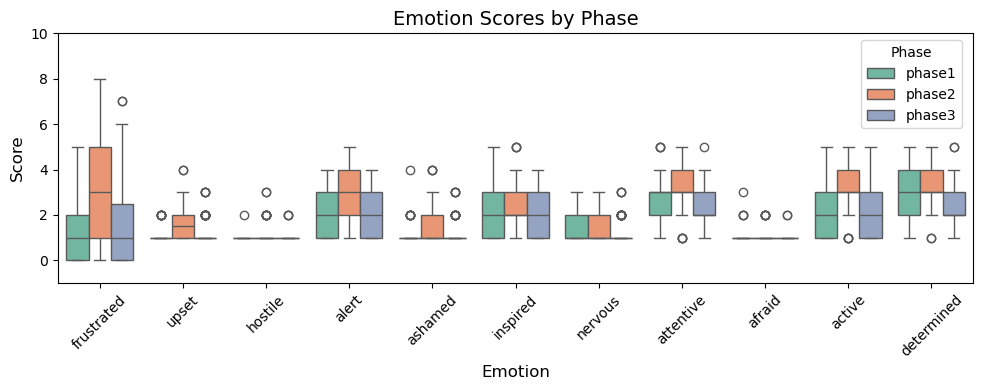

In [22]:
# Combine Phase and emotion scores
full_df = data_pd[['Phase']].join(emotions_df)

# Create melted_df by reshaping to long format
emotion_cols = emotions_df.columns
melted_df = full_df.melt(id_vars='Phase', value_vars=emotion_cols,
                         var_name='Emotion', value_name='Score')

# Ensure Phase is ordered correctly for plotting
phase_order = ['phase1', 'phase2', 'phase3']  # use your actual phase labels
melted_df['Phase'] = pd.Categorical(melted_df['Phase'], categories=phase_order, ordered=True)

# Plot
plt.figure(figsize=(10, 4))
sns.boxplot(x='Emotion', y='Score', hue='Phase', data=melted_df,
            palette='Set2', dodge=True)

# Styling
plt.title('Emotion Scores by Phase', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(-1, 10)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(title='Phase', bbox_to_anchor=(0.87, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### pairwise t-test to evaluate statistical difference between diff emotions per phases 

In [25]:
# data_pd.groupby(['Individual', 'Phase']).size().unstack()
# List of emotion columns
emotion_cols = emotions_df.columns # Adjust if needed
phases = ['phase1', 'phase2', 'phase3']

# Average over rounds
df_avg = data_pd.groupby(['Individual', 'Phase'])[emotion_cols].mean().reset_index()

results = []

for emotion in emotion_cols:
    df_e = df_avg.pivot(index='Individual', columns='Phase', values=emotion)
    
    for p1, p2 in combinations(phases, 2):
        pair = df_e[[p1, p2]].dropna()
        if len(pair) > 1:
            stat, p = ttest_rel(pair[p1], pair[p2])
            results.append({
                'emotion': emotion,
                'comparison': f"{p1} vs {p2}",
                't_stat': stat,
                'p_value': p
            })

# Adjust p-values using Bonferroni correction
results_df = pd.DataFrame(results)
results_df['p_bonferroni'] = multipletests(results_df['p_value'], method='bonferroni')[1]
results_df

,emotion,comparison,t_stat,p_value,p_bonferroni
0,frustrated,phase1 vs phase2,-7.223388,1.434979e-07,0.000005
1,frustrated,phase1 vs phase3,-3.912964,6.193426e-04,0.020438
2,frustrated,phase2 vs phase3,5.099173,2.884134e-05,0.000952
3,upset,phase1 vs phase2,-6.692395,5.168090e-07,0.000017
4,upset,phase1 vs phase3,-3.566664,1.493155e-03,0.049274
5,upset,phase2 vs phase3,4.038253,4.490590e-04,0.014819
6,hostile,phase1 vs phase2,-2.281784,3.128185e-02,1.000000
7,hostile,phase1 vs phase3,-1.443376,1.613294e-01,1.000000
8,hostile,phase2 vs phase3,1.805788,8.300760e-02,1.000000
9,alert,phase1 vs phase2,-5.313880,1.657970e-05,0.000547


#### clustering of fetaures in seft-reported quastionaire

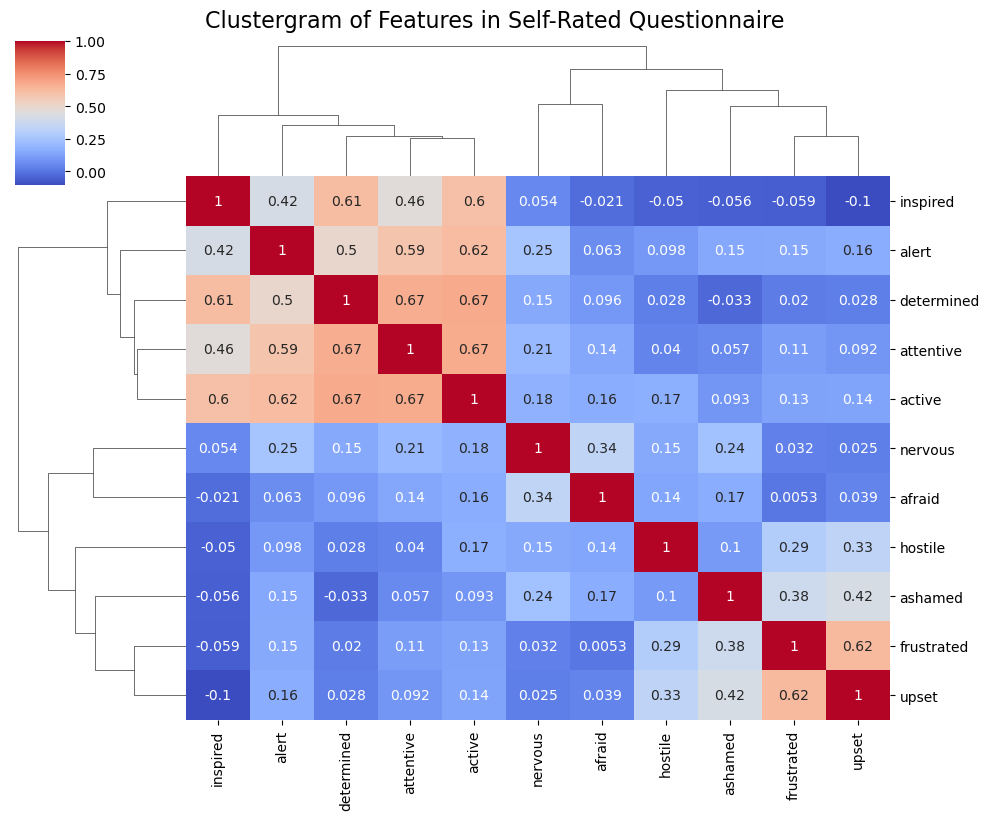

In [26]:
clustergrid = sns.clustermap(emotions_df.corr(), cmap='coolwarm', annot=True, figsize=(10, 8))

# Add a centered title above the whole figure
clustergrid.fig.suptitle('Clustergram of Features in Self-Rated Questionnaire', 
                         fontsize=16, y=1.02)  # y adjusts vertical position

# Show plot
plt.show()